## Hierarchical K-Means: Construction of Hashing Tree
- Hierarchical clustering is the hierarchical decomposition of the data based on groupsimilarities. It allows us to build tree structures from data similarities and see how different subclusters relate to each other, and how far apart data points are. It gives us a tree-type structure based on the hierarchical series of nested clusters. 
- A diagram called Dendrogram graphically represents this hierarchy and is an inverted tree that describes the order in which factors are merged, or clusters are broken apart.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#### Wholesale customers Data Set: 
###### https://archive.ics.uci.edu/ml/datasets/wholesale+customers

1. FRESH: annual spending (m.u.) on fresh products (Continuous);
2. MILK: annual spending (m.u.) on milk products (Continuous);
3. GROCERY: annual spending (m.u.)on grocery products (Continuous);
4. FROZEN: annual spending (m.u.)on frozen products (Continuous)
5. DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6. DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7. CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8. REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)

In [2]:
df = pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [10]:
df.shape

(440, 8)

In [11]:
df.groupby(['Channel', 'Region']).mean()

Fresh          Milk       Grocery       Frozen  \
Channel Region                                                          
1       1       12902.254237   3870.203390   4026.135593  3127.322034   
        2       11650.535714   2304.250000   4395.500000  5745.035714   
        3       13878.052133   3486.981043   3886.734597  3656.900474   
2       1        5200.000000  10784.000000  18471.944444  2584.111111   
        2        7289.789474   9190.789474  16326.315789  1540.578947   
        3        9831.504762  10981.009524  15953.809524  1513.200000   

                Detergents_Paper   Delicassen  
Channel Region                                 
1       1             950.525424  1197.152542  
        2             482.714286  1105.892857  
        3             786.682464  1518.284360  
2       1            8225.277778  1871.944444  
        2            8410.263158  1239.000000  
        3            6899.238095  1826.209524

In [126]:
from sklearn.cluster import AgglomerativeClustering

X = df.values
clustering = AgglomerativeClustering(n_clusters=2)
y = clustering.fit_predict(X)

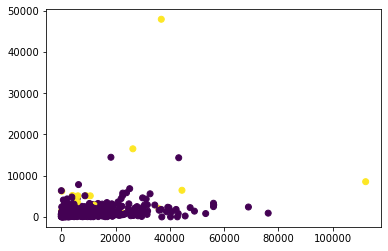

In [13]:
plt.scatter(df.Fresh, df.Delicassen, c=y)

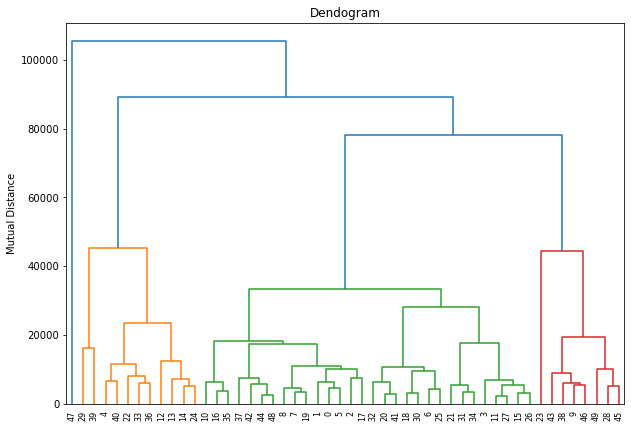

In [127]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendogram")  
shc.dendrogram(shc.linkage(X[:50],method='ward'))
plt.ylabel("Mutual Distance")
plt.show()

In [128]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=2)
y = clustering.fit_predict(df.values)
y

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

In [129]:
from collections import Counter
Counter(y)

Counter({0: 306, 1: 134})

In [130]:
df1 = df.copy()
df1['cluster'] = y.reshape(-1,1)

In [131]:
df1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


In [132]:
round(df1.groupby(['cluster', 'Channel', 'Region']).mean())

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
cluster Channel Region                                                        
0       1       1        5842.0   4263.0   4149.0  2612.0            1251.0   
                2        5749.0   1619.0   3800.0  4362.0             363.0   
                3        5682.0   3116.0   3517.0  2811.0             836.0   
        2       1        4283.0  11070.0  19017.0  2633.0            8558.0   
                2        4885.0  10040.0  18144.0   970.0            9543.0   
                3        7024.0  12052.0  17372.0  1444.0            7715.0   
1       1       1       25678.0   3159.0   3804.0  4060.0             408.0   
                2       20771.0   3363.0   5316.0  7883.0             667.0   
                3       27574.0   4106.0   4504.0  5071.0             705.0   
        2       1       20782.0   5921.0   9212.0  1759.0            2568.0   
                2       20118.0   4663.0   6631.0  4583.0            2368.0   
                3       22540.0   6132.0   9534.0  1827.0            3206.0   

                        Delicassen  
cluster Channel Region              
0       1       1            894.0  
                2            868.0  
                3           1024.0  
        2       1           1891.0  
                2            994.0  
                3           1784.0  
1       1       1           1745.0  
                2           1474.0  
                3           2345.0  
        2       1           1553.0  
                2           2543.0  
                3           2017.0

I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
I:\ProgramData\Anaconda3\envs\myenv\lib\

I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
I:\ProgramData\Anaconda3\envs\myenv\lib\

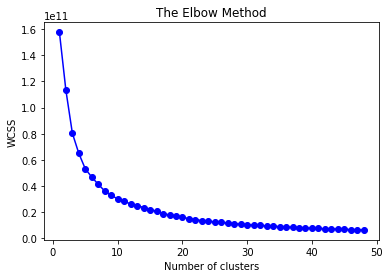

In [20]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,49):
    model = KMeans(n_jobs=-1, n_clusters = i, random_state=10)
    model.fit(df.values)
    wcss.append(model.inertia_)

plt.plot(range(1,49), wcss, marker='o',color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [119]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=8)
# clustering = AgglomerativeClustering(n_clusters=None, compute_full_tree = True, distance_threshold = 90000)

y = clustering.fit_predict(df.values)

In [124]:
Counter(y)

Counter({2: 86, 3: 175, 1: 111, 4: 40, 6: 20, 0: 5, 7: 1, 5: 2})

In [121]:
df2 = df.copy()
df2['cluster'] = y.reshape(-1,1)

In [122]:
df2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,3
4,2,3,22615,5410,7198,3915,1777,5185,1


In [125]:
round(df2.groupby(['cluster', 'Channel', 'Region']).agg(['mean', 'sum']))

Fresh              Milk          Grocery          \
                            mean      sum     mean     sum     mean     sum   
cluster Channel Region                                                        
0       2       2         8565.0     8565   4980.0    4980  67298.0   67298   
                3        29862.0   119450  53081.0  212323  60016.0  240063   
1       1       1        21247.0   382449   3014.0   54248   3703.0   66649   
                2        19576.0   195764   2021.0   20206   4485.0   44853   
                3        21203.0  1314586   3382.0  209691   4081.0  253020   
        2       1        20782.0    20782   5921.0    5921   9212.0    9212   
                2        20118.0    60353   4663.0   13988   6631.0   19893   
                3        20462.0   347859   6391.0  108646  10019.0  170321   
2       1       1         6443.0    45101  11307.0   79152   9651.0   67558   
                3         5909.0    82726   8274.0  115843   9921.0  138890   
        2       1         3475.0    20850   7506.0   45038  14361.0   86168   
                2         3371.0    26969   9554.0   76428  10922.0   87377   
                3         6437.0   328283   8510.0  434001  11395.0  581129   
3       1       1         5707.0   176902   2673.0   82853   2906.0   90096   
                2         5749.0    97734   1619.0   27529   3800.0   64595   
                3         5655.0   667234   2504.0  295527   2758.0  325393   
        2       1         5468.0    16403   4418.0   13253   5656.0   16969   
                2         7588.0     7588   1897.0    1897   5234.0    5234   
                3         7739.0    38693   3733.0   18663   6282.0   31411   
4       2       1         4446.0    35565  16238.0  129900  27518.0  220146   
                2         5838.0    35031  12889.0   77332  21733.0  130398   
                3         4524.0   117623  14289.0  371513  24669.0  641395   
5       1       2        32717.0    32717  16784.0   16784  13626.0   13626   
                3        36847.0    36847  43950.0   43950  20170.0   20170   
6       1       1        52260.0   156781   4030.0   12089   4413.0   13239   
                3        47648.0   714725   2741.0   41115   4299.0   64480   
        2       3        40200.0    80400   3930.0    7860   5416.0   10831   
7       1       3       112151.0   112151  29627.0   29627  18148.0   18148   

                         Frozen         Detergents_Paper         Delicassen  \
                           mean     sum             mean     sum       mean   
cluster Channel Region                                                        
0       2       2         131.0     131          38102.0   38102     1215.0   
                3        3262.0   13049          27942.0  111769     3082.0   
1       1       1        3921.0   70579            335.0    6034     1681.0   
                2        2584.0   25843            607.0    6066     1060.0   
                3        4096.0  253933            649.0   40257     1521.0   
        2       1        1759.0    1759           2568.0    2568     1553.0   
                2        4583.0   13748           2368.0    7105     2543.0   
                3        1930.0   32816           3401.0   57813     2048.0   
2       1       1        2753.0   19271           2838.0   19868     1869.0   
                3        2067.0   28941           2712.0   37966     1610.0   
        2       1         781.0    4685           6059.0   36355     2230.0   
                2         884.0    7073           5644.0   45153      931.0   
                3        1524.0   77706           5029.0  256495     1794.0   
3       1       1        2580.0   79985            892.0   27654      674.0   
                2        4362.0   74149            363.0    6178      868.0   
                3        2899.0  342062            613.0   72323      954.0   
        2       1        5626.0   16879           2353.0    7059     1206.0 